## Install MPSlib (if not allready installed)


In [1]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
    exe_folder = ''
        
except ImportError:
    import sys
    is_colab = 'google.colab' in sys.modules
    print (is_colab)
    if is_colab:
        import os
        os.chdir('/content')
        print('%s cannot be loaded. trying to install it.' % module_name)
        !curl -O https://raw.githubusercontent.com/ergosimulation/mpslib/master/install_latest_mpslib.sh
        !sh ./install_latest_mpslib.sh
        os.chdir('/content')
        exe_folder = '/content/mpslib'
    else:
        print('Pleas install MPSlib and scikit-mps from http://github.com/ergosimulation/mpslib/')
    
import sys
is_colab = 'google.colab' in sys.modules
if is_colab:
    exe_folder = '/content/mpslib'
else:
  exe_folder = ''

print("Using MPSlib installed in %s " % exe_folder)


True
mpslib cannot be loaded. trying to install it.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   367  100   367    0     0   2005      0 --:--:-- --:--:-- --:--:--  1994
Cloning into 'mpslib'...
remote: Enumerating objects: 330, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 3384 (delta 224), reused 187 (delta 107), pack-reused 3054
Receiving objects: 100% (3384/3384), 24.42 MiB | 25.64 MiB/s, done.
Resolving deltas: 100% (2362/2362), done.
make -C mpslib
make[1]: Entering directory '/content/mpslib/mpslib'
g++ -o ENESIM.o -I. -O3 -march=native -std=c++11 -c ENESIM.cpp
g++ -o Coords3D.o -I. -O3 -march=native -std=c++11 -c Coords3D.cpp
g++ -o MPSAlgorithm.o -I. -O3 -march=native -std=c++11 -c MPSAlgorithm.cpp
g++ -o Coords4D.o -I. -O3 -march=native -std=c++11 -c Coords4D.cpp
g++ -o IO.o -I. -O3 -mar

In [0]:
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np

## Select traning image

Beginning download of http://www.trainingimages.org/uploads/3/4/7/0/34703305/ti_strebelle.sgems to ti_strebelle.dat


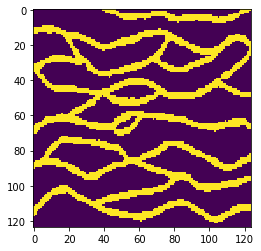

In [3]:

TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
#TI, TI_filename = mps.trainingimages.checkerboard2()
#TI, TI_filename = mps.trainingimages.rot90()
plt.imshow(TI[:,:,0].T)
#mps.trainingimages.ti_plot_all()

## Setup MPSlib

In [0]:
O = mps.mpslib(method='mps_snesim_tree',
                    mpslib_exe_folder=exe_folder,
                    verbose_level=-1, debug_level=-1)
#O = mps.mpslib(method='mps_genesim')
O.parameter_filename = 'mps.txt'
O.par['n_real']=39
O.par['n_cond']=36
O.par['template_size']=np.array([[10,5],[10,5],[1,1]])
O.par['origin']=np.array([0,0,0])
O.par['simulation_grid_size']=np.array([40,20,1])

# hard data
O.d_hard = np.array([[ 10, 5, 0, 1],
                       [ 30, 15, 0, 0]])

# soft data
O.d_soft = np.array([[ 10, 15, 0, 0.9, 0.1],
                       [ 30, 5, 0, 0.9, 0.1]])

## Run MPSlib

In [5]:
O.ti = TI
# Serial 
#O.run_par()
# Parallel
O.run_parallel()

parallel: using 2 threads to simulate 39 realizations
parallel: with up to 20 relizations per thread
parallel: Using 2 of max 2 threads
__name__ = mpslib.mpslib
Thread:000, nr=20
Thread:001, nr=19
parallel job done. Collecting data from threads
parallel: collected 39 realizations


## Plot realizations and E-types

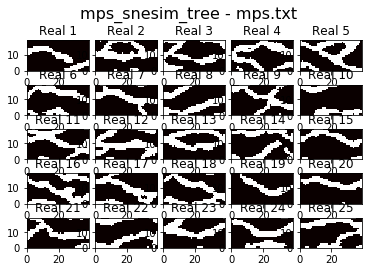

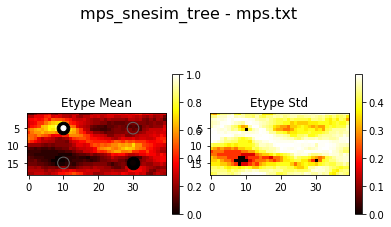

In [6]:
O.plot_reals()
O.plot_etype()